# Posterior Gaussian Process

A stochastic process is a probability distribution over functions $f(\mathbf{x})$, where $\mathbf{x} \in \mathbb{R}^D$, such that, when evaluated at any arbitrary set of points $\mathbf{x}_1, \ldots, \mathbf{x}_N$, the values $f(\mathbf{x}_1), \ldots, f(\mathbf{x}_N)$ follow a specific joint, multivariate probability distribution. If this distribution is a normal distribution, then it is a Gaussian process.

In general, the covariance matrices arising in a Gaussian process are completely specified, if the $(i,j)$ entry is given by evaluating a kernel function at $\mathbf{x}_i$ and $\mathbf{x}_j$, i.e. $k(\mathbf{x}_i, \mathbf{x}_j)$. The covariance matrix is then the Gram matrix and positive definite.

Given training data pairs $(\mathbf{x}_1, t_1), \ldots, (\mathbf{x}_N, t_N)$, let $\mathbf{C}$ be a matrix with $(i,j)$ entry
\begin{equation}
C_{ij} = k(\mathbf{x}_i, \mathbf{x}_j) + \sigma^2 \delta_{ij},
\end{equation}
where $k(\cdot, \cdot)$ is a kernel and $\delta_{ij}$ is zero for $i \neq j$ and one for $i=j$ and is known as the Kronecker delta. $\sigma^2$ is the noise variance. Let $\mathbf{x}^*_1, \ldots, \mathbf{x}^*_{N^*}$ be $N^*$ points where predictions $\mathbf{t}^* = (t_1^*, \ldots, t_{N^*}^*)^T$ are to be made. The joint distribution of $(\mathbf{t}, \mathbf{t}^*)$ has covariance matrix
\begin{equation}
\left( \begin{array}{cc} \mathbf{C} & \mathbf{K} \\ \mathbf{K}^T & \mathbf{C}^* \end{array} \right),
\end{equation}
where $\mathbf{K}$ is a $N \times N^*$ matrix with $(n,m)$ entry given by $k(\mathbf{x}_n, \mathbf{x}^*_m)$ and the $(i,j)$ entry of $\mathbf{C}^*$ is $k(\mathbf{x}^*_i, \mathbf{x}^*_j) + \sigma^2 \delta_{ij}$. The conditional probability distribution of $\mathbf{t}^*$ given $\mathbf{t}$ has mean and variance
\begin{equation}
\begin{array}{rcl}
\mathbf{m}^* & = & \mathbf{K}^T \mathbf{C}^{-1} \mathbf{t}, \\[8pt]
\boldsymbol{\Sigma}^* & = & \mathbf{C}^* - \mathbf{K}^T \mathbf{C}^{-1} \mathbf{K}.
\end{array}
\end{equation}
We can draw point values from this distribution and plot as functions to illustrate draws from the posterior Gaussian process. The kernel parameters are optimised given the training data pairs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels

In [2]:
x = np.linspace(-5.0, 5.0, 101).reshape(-1, 1)
y = 1.0 + x + np.sin(x)
# Number of training data points:
N=4
x_train = np.linspace(-4.0,1.0, N).reshape(-1,1)
rng = np.random.default_rng()
# Noise variance:
noise  = 0.01
noise_draw = rng.multivariate_normal(np.zeros(N),
                  noise * np.identity(N)).reshape(-1,1)
y_train = 1.0 + x_train + np.sin(x_train) + noise_draw

In [3]:
# Initialise Gaussian kernel with multiplier 1.0 and length scale 1.0.
kernel = 1.0 * kernels.RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# Fit to training data and optimize parameters.
gpr.fit(x_train, y_train)
# Optimised kernel:
gpr.kernel_

4.87**2 * RBF(length_scale=4.41)

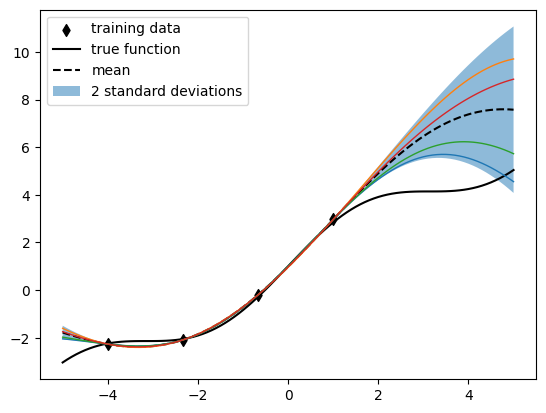

In [4]:
plt.scatter(x_train, y_train, marker = 'd', c = 'k', label = 'training data')
plt.plot(x,y, c = 'k', label = 'true function')
mean_posterior, std_posterior = gpr.predict(x, return_std=True)
plt.plot(x, mean_posterior, c = 'k', linestyle = 'dashed', label = 'mean')
plt.fill_between(x.ravel(), mean_posterior - 2 * std_posterior,
    mean_posterior + 2 * std_posterior, alpha=0.5,
    label = '2 standard deviations')
# Draw four samples from the posterior.
f = gpr.sample_y(x, 4)
plt.plot(x,f, linewidth = 1)
plt.legend()
plt.show()

In [5]:
# Initialise Matern kernel with multiplier 1.0, length scale 1.0 and
# smoothness parameter 0.5. With this choice of smoothness parameter
# the kernel becomes the exponential kernel.
kernel = 1.0 * kernels.Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),
                              nu = 0.5)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# Fit to training data and optimize parameters.
gpr.fit(x_train, y_train)
# Optimised kernel:
gpr.kernel_

2.22**2 * Matern(length_scale=2.34, nu=0.5)

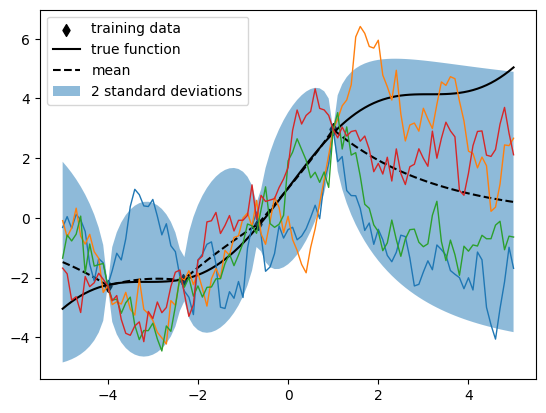

In [6]:
plt.scatter(x_train, y_train, marker = 'd', c = 'k', label = 'training data')
plt.plot(x,y, c = 'k', label = 'true function')
mean_posterior, std_posterior = gpr.predict(x, return_std=True)
plt.plot(x, mean_posterior, c = 'k', linestyle = 'dashed', label = 'mean')
plt.fill_between(x.ravel(), mean_posterior - 2 * std_posterior,
    mean_posterior + 2 * std_posterior, alpha=0.5,
    label = '2 standard deviations')
# Draw four samples from the posterior.
f = gpr.sample_y(x, 4)
plt.plot(x,f, linewidth = 1)
plt.legend()
plt.show()

In [7]:
# Initialise rational quadratic kernel with multiplier 1.0, length scale 1.0
# and scale mixture parameter 0.5. With this choice of scale mixture parameter
# the kernel becomes the inverse multiquadric kernel.
kernel = 1.0 * kernels.RationalQuadratic(length_scale = 1.0, alpha = 0.5,
                                         length_scale_bounds = (1e-2, 1e2),
                                         alpha_bounds = 'fixed')
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# Fit to training data and optimize parameters.
gpr.fit(x_train, y_train)
# Optimised kernel:
gpr.kernel_

6.45**2 * RationalQuadratic(alpha=0.5, length_scale=6.32)

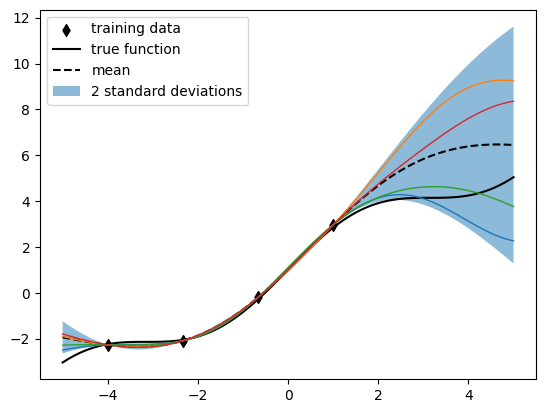

In [8]:
plt.scatter(x_train, y_train, marker = 'd', c = 'k', label = 'training data')
plt.plot(x,y, c = 'k', label = 'true function')
mean_posterior, std_posterior = gpr.predict(x, return_std=True)
plt.plot(x, mean_posterior, c = 'k', linestyle = 'dashed', label = 'mean')
plt.fill_between(x.ravel(), mean_posterior - 2 * std_posterior,
    mean_posterior + 2 * std_posterior, alpha=0.5,
    label = '2 standard deviations')
# Draw four samples from the posterior.
f = gpr.sample_y(x, 4)
plt.plot(x,f, linewidth = 1)
plt.legend()
plt.show()

In [9]:
# Initialise kernel to sum of the Gaussian kernel with multiplier 1.0
# and length scale 1.0 and the dot product kernel with multiplier 1.0 and
# inhomogenity parameter 0.0. With this choice of inhomogenity parameter it
# becomes the linear kernel.
kernel = kernels.DotProduct(sigma_0=1.0, sigma_0_bounds= 'fixed') + \
         1.0 * kernels.RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# Fit to training data and optimize parameters.
gpr.fit(x_train, y_train)
# Optimised kernel:
gpr.kernel_

DotProduct(sigma_0=1) + 2.7**2 * RBF(length_scale=3.01)

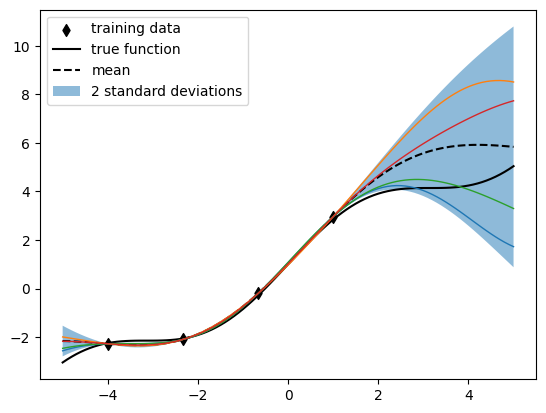

In [10]:
plt.scatter(x_train, y_train, marker = 'd', c = 'k', label = 'training data')
plt.plot(x,y, c = 'k', label = 'true function')
mean_posterior, std_posterior = gpr.predict(x, return_std=True)
plt.plot(x, mean_posterior, c = 'k', linestyle = 'dashed', label = 'mean')
plt.fill_between(x.ravel(), mean_posterior - 2 * std_posterior,
    mean_posterior + 2 * std_posterior, alpha=0.5,
    label = '2 standard deviations')
# Draw four samples from the posterior.
f = gpr.sample_y(x, 4)
plt.plot(x,f, linewidth = 1)
plt.legend()
plt.show()